# <center>Open Source Software for Change Detection with Polarimetric SAR Imagery</center>

## <center> * Mort Canty and Irmgard Niemeyer <br />  Forschungszentrum Jülich GmbH * </center>

## <center> * Knut Conradsen, Allan Nielsen and Henning Skriver <br /> Technical University of Denmark *

# Outline
##  Software Platform
##  Methodology
##  An Example
##  Future Work

## --------------------------------------------------------------------------------------------------------------------------------

## Software Platform

__The change detection processing routines consist of Python programs which can either be called directly from the command line, or strung together with Bash scripts.__

__The user interface is an <u>ordinary browser</u> which communicates with an <u>IPython kernel</u>. The kernel can be running locally or on another server. This combination is referred to as an <u>IPython (or Jupyter) Notebook </u>.__

__To facilitate use the entire system, including the IPython kernel, is encapsulated in a <u>Docker Container</u>.__


<img src="imagery/docker.png">

## Installation

__On 64-bit Ubuntu Linux:__

 1. <a href="https://docs.docker.com/installation/ubuntulinux/">Install Docker</a>
 2. In a terminal, run the command<br />
      __docker run -d -p 433:8888 -v *your_image_directory* : /sar/imagery mort/sardocker__<br />
     where *your_image_directory* is the path to your SAR data. 
 3. Point your browser to     __localhost:433__
 4. Open a new notebook with __New/Python 2__.
 
__On Windows (or Mac):__

 1. <a href="https://docs.docker.com/installation/windows/">Install boot2docker</a>
 2. Share your image directory with VirtualBox
 3. Proceed from step 2. above.

## ----------------------------------------------------------------------------------------------------------------------------

__The Notebook communicates directly with the Python kernel:__

In [1]:
2+2

4

__Operating sytem commands can also be entered directly. Here are the contents of the main directory in the Docker container:__

In [2]:
ls -l /sar

total 3912
-rw-rw-r-- 1 root root   11115 May 27 11:03 dispms.py
-rw-rw-r-- 1 root root    7746 Jun 16 08:17 enlml.py
drwxrwxr-x 7 1000 1000    4096 Sep 20 09:23 imagery/
-rw-rw-r-- 1 root root    4399 Jun 16 08:17 ingest.py
-rwxr-xr-x 1 root root    8072 Sep 17 15:08 libprov_means.so*
-rwxrw-r-- 1 root root    2509 Jun 16 08:17 mapready.sh*
-rw-rw-r-- 1 root root     693 May 17 14:58 prov_means.c
-rw-rw-r-- 1 root root     831 Jun 15 17:04 radarsat2quadpol.template
-rw-rw-r-- 1 root root    8636 Jun 10 12:55 register.py
-rw-rw-r-- 1 root root     815 Jun 12 07:53 terrasarxdualpol.template
-rw-rw-r-- 1 root root 3894390 Jun 20 08:57 tutorial.ipynb
-rw-rw-r-- 1 root root      50 Jun 10 11:14 utm.prj
-rw-r----- 1 root root   19886 Sep 22 08:19 vortrag.ipynb
-rw-rw-r-- 1 root root   10208 Jun 15 19:03 wishart.py
-rwxrw-r-- 1 root root     801 Jun 15 18:58 wishart.sh*


__The imagery directory contains the polSAR data and is shared with the host. In the present case there are two Radarsat-2 quadpol images in SLC (single-look complex) format along with a dem (digital elevation model). Acquistion times are April 26 and May 20, 2010:__

In [4]:
ls -l /sar/imagery

total 88
drwx------ 4 1000 1000  4096 Jun 15 17:11 RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC/
drwx------ 4 1000 1000  4096 Jun 15 17:11 RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC/
drwx------ 2 1000 1000  4096 Sep 17  2014 dem/
-rw-rw-r-- 1 1000 1000 76853 Sep 18 09:01 docker.png


__The images are level one SLC (single look complex format). For example, here are the contents of the image directory corresponding to acquistion date 20100426 (April 26, 2010):__

In [3]:
ls -l /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC/

total 336292
-rw------- 1 1000 1000   741610 Apr 27  2010 BrowseImage.tif
-rw------- 1 1000 1000    44218 Oct  2  2009 DFAIT_RS2 EULA_Single User License.pdf
-rw------- 1 1000 1000      623 Jun 15 16:12 GEARTH_POLY.kml
drwx------ 2 1000 1000     4096 Sep 20 09:16 T3/
-rw------- 1 1000 1000    89600 Apr 28  2010 Thumbs.db
-rw------- 1 1000 1000 85731468 Apr 27  2010 imagery_HH.tif
-rw------- 1 1000 1000 85731468 Apr 27  2010 imagery_HV.tif
-rw------- 1 1000 1000 85731468 Apr 27  2010 imagery_VH.tif
-rw------- 1 1000 1000 85731468 Apr 27  2010 imagery_VV.tif
-rw------- 1 1000 1000    49475 Apr 27  2010 lutBeta.xml
-rw------- 1 1000 1000    49475 Apr 27  2010 lutGamma.xml
-rw------- 1 1000 1000    49475 Apr 27  2010 lutSigma.xml
-rw------- 1 1000 1000   119099 Apr 27  2010 product.xml
-rw------- 1 1000 1000   160314 Jun 15 16:12 product_header.txt
-rw------- 1 1000 1000    15152 Jun 15 16:12 product_lut.bin
-rw------- 1 1000 1000    49765 Jun 15 16:12 product_lut.txt
-rw------- 1 1000 100

__The four polarization combinations HH, HV,VH and VV are are stored as complex numbers in GeoTiff format.__

## ---------------------------------------------------------------------------------------------------------------------------

## Methodology

__A fully polarimetric SAR measures a
$2\times 2$ _scattering matrix_ $S$  at each resolution cell on the ground.
The scattering matrix relates the incident and the backscattered
electric fields $E^i$ and $E^b$ according to__

$$
\pmatrix{E_h^b \cr E_v^b}
=\pmatrix{S_{hh} & S_{hv}\cr S_{vh} & S_{vv}}\pmatrix{E_h^i \cr E_v^i}.
$$


__The per-pixel polarimetric information in the scattering matrix $S$ can be expressed as a three-component complex vectors__

$$
s = \pmatrix{S_{hh}\cr \sqrt{2}S_{hv}\cr S_{vv}},
$$

__The observation vector $s$ can be shown to be a realization of a complex multivariate normal random variable. An equivalent representation is interms of the *coherency vector*__

$$
k = {1\over\sqrt{2}}\pmatrix{S_{hh} + S_{vv}\cr S_{hh} - S_{vv} \cr 2S_{hv}}.
$$

__After multi-looking the polarimetric signal is can also be represented by the covariance matrix of each multi-look pixel:__

$$
C  ={1\over m}\sum_{\nu=1}^m  s(\nu) s(\nu)^\top = \langle  s s^\top \rangle
 = \pmatrix{ \langle |S_{hh}|^2\rangle & \langle\sqrt{2}S_{hh}S_{hv}^*\rangle & \langle S_{hh}S_{vv}^*\rangle \cr
\langle\sqrt{2} S_{hv}S_{hh}^*\rangle & \langle 2|S_{hv}|^2\rangle & \langle\sqrt{2}S_{hv}S_{vv}^*\rangle \cr
\langle S_{vv}S_{hh}^*\rangle & \langle\sqrt{2}S_{vv}S_{hv}^*\rangle & \langle |S_{vv}|^2\rangle },
$$

__where $m$ is the number of looks. The diagonal elements of $C$ are real numbers, with span $= {\rm tr}(C)$, and the off-diagonal elements are complex. This matrix representation contains all of the information in the multi-look polarimetric signal.__

## ----------------------------------------------------------------------------------------------------------------

__The matrix $C$ (or rather the equivalent coherency matrix $T=\langle  k k^\top \rangle$) is generated by open source software package <a href="https://earth.esa.int/web/polsarpro/home">PolSARpro</a> (ESA) and stored in the subdirectory T3.__ 

__The image files are in ENVI format:__

In [4]:
ls -l /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC/T3

total 66568
-rw------- 1 1000 1000 5231574 Jun 15 16:14 PauliRGB.bmp
-rw------- 1 1000 1000 6986432 Jun 15 16:14 T11.bin
-rw------- 1 1000 1000     247 Jun 15 16:14 T11.bin.hdr
-rw------- 1 1000 1000 6986432 Jun 15 16:14 T12_imag.bin
-rw------- 1 1000 1000     252 Jun 15 16:14 T12_imag.bin.hdr
-rw------- 1 1000 1000 6986432 Jun 15 16:14 T12_real.bin
-rw------- 1 1000 1000     252 Jun 15 16:14 T12_real.bin.hdr
-rw------- 1 1000 1000 6986432 Jun 15 16:14 T13_imag.bin
-rw------- 1 1000 1000     252 Jun 15 16:14 T13_imag.bin.hdr
-rw------- 1 1000 1000 6986432 Jun 15 16:14 T13_real.bin
-rw------- 1 1000 1000     252 Jun 15 16:14 T13_real.bin.hdr
-rw------- 1 1000 1000 6986432 Jun 15 16:14 T22.bin
-rw------- 1 1000 1000     247 Jun 15 16:14 T22.bin.hdr
-rw------- 1 1000 1000 6986432 Jun 15 16:14 T23_imag.bin
-rw------- 1 1000 1000     252 Jun 15 16:14 T23_imag.bin.hdr
-rw------- 1 1000 1000 6986432 Jun 15 16:14 T23_real.bin
-rw------- 1 1000 1000     252 Jun 15 16:14 T23_real.bin.hdr
-rw----

## Change Detection

__If we represent a pixel vector in an $m$ look-averaged
polarimetric SAR image in covariance matrix format by $C$, then the quantity__

$$
mC =  x = \sum_{\nu=1}^m  s(\nu) s(\nu)^\top
$$

__has a so-called <u>complex Wishart distribution</u>, see
 <a href="http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=1219">Conradsen et al (2004)</a>. That distribution is characterized by the covariance matrix parameter $\Sigma$.__


__Define the per-pixel null (or no-change) hypothesis__

$$
H_0:\quad \Sigma_1 = \Sigma_2 = \Sigma,
$$

__against the alternative composite hypothesis__

$$
H_1: \quad \Sigma_1 \ne \Sigma_2
$$


__Then the *likelihood ratio test* has the critical region for rejection of the no-change hypothesis__

$$
Q = {L(\hat\Sigma) \over L(\hat\Sigma_1,\hat\Sigma_2) } = 2^{6m}{ |x_1|^m |x_2|^m \over |x_1 + x_2|^{2m} } \le k.
$$

__In order to choose a sensible value for $k$ we have to know how the test statistic $Q$ is distributed. In fact the quantity  $-2\log Q$ has the approximate distributon__

$$
{\rm prob}(-2\log Q\le z) \simeq P_{\chi^2;N^2}(z).
$$

__So in practice we choose a significance level $\alpha$, e.g., $\alpha = 0.01$, and decision threshold $z$ such that__

$$
{\rm prob}(-2\log Q\le z) = 1-\alpha
$$

__and interpret all pixels with larger values of $-2\rho\log Q$ as change.__

## ------------------------------------------------------------------------------------------------------------

## Processing Chain

__The following processing sequence  generates a change map from two
polarimetric SAR images provided at the single look complex (SLC) processing level:__

__1. First of all two multi-look polarimetric SAR images in covariance or coherency matrix format are generated from the SLC data
with PolSARPro. Presently this must be done outside of the Docker container (and IPython).__

__2. The matrix images are imported by MapReady for terrain correction and georeferencing.  The bash script <u>mapready.sh</u> automates the procedure. MapReady will output the geocoded covariance/cohernecy matrix images in the form of co-registered GeoTiff files, one for each diagonal matrix element and two (real and imaginary parts) for each off-diagonal component. A python script <u>ingest.py</u> is called automatically to combine these files to a single  multi-band image in floating point format.__ 

__3. The ENL (equivalent number of looks) can (optionally) be estimated with the script <u>enlml.py</u>. A multivariate estimator is used as described by <a href="http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=5071293&url=http%3A%2F%2Fieeexplore.ieee.org%2Fiel5%2F36%2F5291960%2F05071293.pdf%3Farnumber%3D5071293">Anfinsen et al. (2009)</a>.__

__4. Finally the change detection algorithm is invoked with the bash script <u>wishart.sh</u>. This script calls the Python programs <u>register.py</u> to co-register the two images and then <u>wishart.py</u> to perform the pixel-wise hypothesis tests.__

## ----------------------------------------------------------------------------------------------------------

## An Example: Radarsat-2 Quadpol Images

__Returning now to the Radarsat-2 image acquired April 24, 2010, we will geocode it with MapReady (step 2 in the processing chain):__

In [5]:
!./mapready.sh 20100426 rs2quad

Geocoding polSARpro multilook polarimetric matrix image with mapready ...
Original SLC image dimensions:      rows 5539  cols 3788
After multi-looking with polSARpro: rows 1384  cols 1262
Azimuth looks: 4
Range looks:   3
***** processing polSARpro polarimetric matrix image:
***** /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC
***** ...
***** Done, see mapready.log
***** Combining into a single image file ...
     Ingest SAR
Sun Sep 20 09:19:26 2015
Directory /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/
writing band 1
writing band 2
writing band 3
writing band 4
writing band 5
writing band 6
writing band 7
writing band 8
writing band 9
elapsed time: 1.63243198395
Multiband image is /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif


__We see that the multi-look images were  created from PolSARpro data with $4\times 3 = 12$ looks.
This corresponds to a square pixel size of close to $12.5\times 12.5$ meters. The combined coherency matrix image at this resolution is stored in *polSAR.tif*.__  

__Before we can see the geocoded image, we have to enable Matplotlib functionality within the notebook with the so-called *magic* command__

In [5]:
%matplotlib inline

__We will use the Python script <u>dispms.py</u> for displaying the result, generating an RGB color composite of the diagonal elements:__

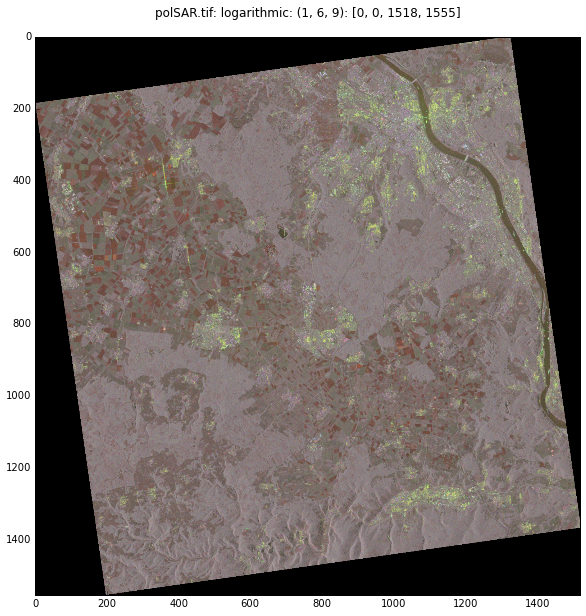

In [6]:
run /sar/dispms -p [1,6,9] -f /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3//polSAR.tif

__Next we can preprocess the second RadarSat image from May 20, 2010:__

In [6]:
!./mapready.sh 20100520 rs2quad

Geocoding polSARpro multilook polarimetric matrix image with mapready ...
Original SLC image dimensions:      rows 5538  cols 3788
After multi-looking with polSARpro: rows 1384  cols 1262
Azimuth looks: 4
Range looks:   3
***** processing polSARpro polarimetric matrix image:
***** /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC
***** ...
***** Done, see mapready.log
***** Combining into a single image file ...
     Ingest SAR
Sun Sep 20 09:23:05 2015
Directory /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC_MapReady/T3/
writing band 1
writing band 2
writing band 3
writing band 4
writing band 5
writing band 6
writing band 7
writing band 8
writing band 9
elapsed time: 1.32068181038
Multiband image is /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif


__Finally, we can perform the last processing step, polSAR cahnge detection. The bash script <u>wishart.sh</u> needs five input parameters, the two acquistion times in yyyymmdd format, a spatial subset, and the two ENL values:__

In [ ]:
!./wishart.sh 20100426 20100520 [400,400,1000,1000] 12.0 12.0

__Here is the change map image generated by the above script:__

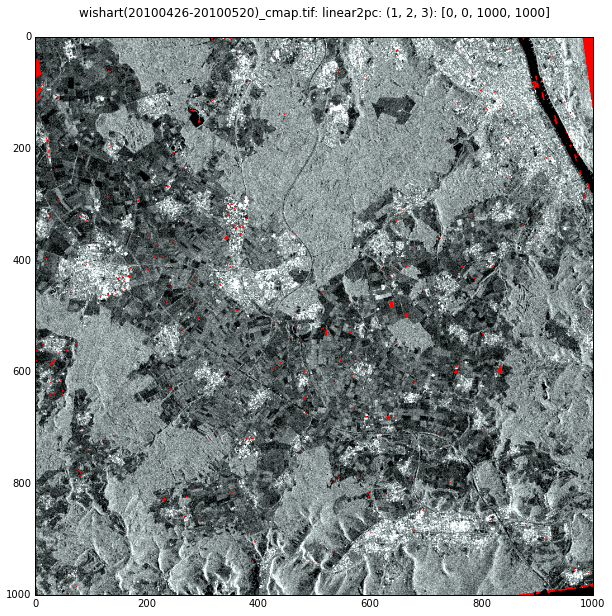

In [7]:
run dispms -e 3 -p [1,2,3] -f /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/wishart(20100426-20100520)_cmap.tif

__Over the short interval of less than a month separating the two acquisitions there are relatively few significant changes, mostly in the agricultural areas near center right and upper left. Barge movements on the Rhine river are clearly evident. Zooming in on the upper left hand corner we can see a flooded  sand quarry pit with two dredging arms that are in continual motion, giving rise to significant change signals.__

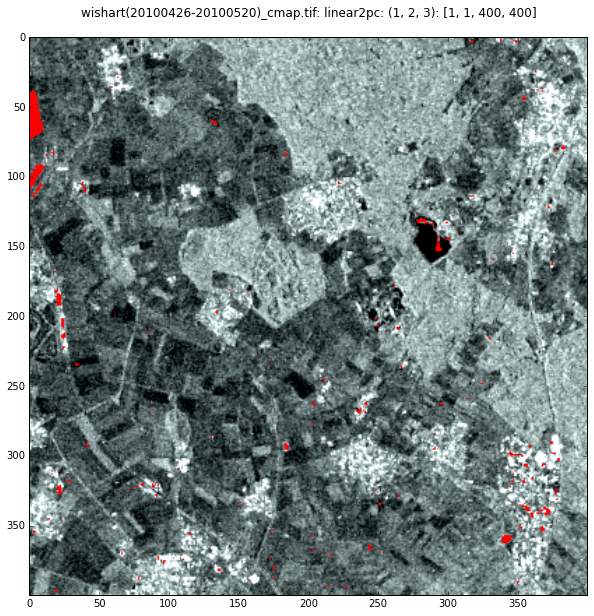

In [8]:
run dispms -e 3 -p [1,2,3] -d [1,1,400,400] -f /sar/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/wishart(20100426-20100520)_cmap.tif

## ----------------------------------------------------------------------------------------------------------

## Software Availability

__Just install Docker! https://docs.docker.com/__

__The source code is on GitHub: http://mortcanty.github.io/SARDocker/__


## Future Work

__1. Inclusion of Sentinel 1a SAR data (presently RadarSat-2 quadpol and TerraSAR-X dualpol)__

__2. Multitemporal statistical tests for presence of change and time of occurence. Conradsen et al. have recently subnitted a series of papers to IEEE TGRS__

__3. Integration into Google Earth Engine__

## --------------------------------------- THANK YOU ------------------------------------------------------